In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
#reading the dataset
df=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

In [3]:
df.head()


,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


Text(0, 0.5, 'y value')

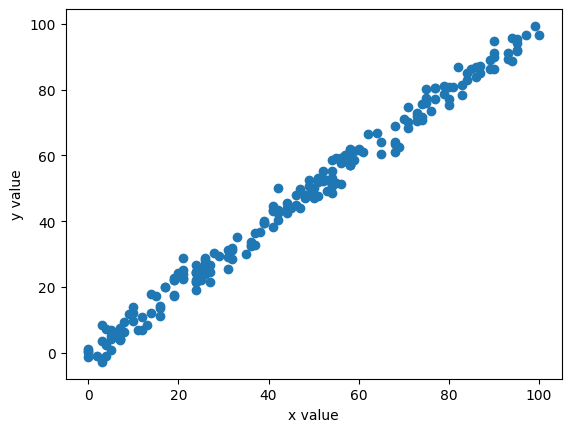

In [4]:
# checking the corealtion between the variable using scatter plot
plt.scatter(df['x'],df['y'])
plt.xlabel("x value")
plt.ylabel("y value")


From above we can ovserv that the relationship between x and y is a linear relationship, to find out if the relationsip is positive or negative we can use correlation, correlation tell us how well the data is linearly corelated.

In [5]:
df.corr()

,x,y
x,1.000000,0.994876
y,0.994876,1.000000


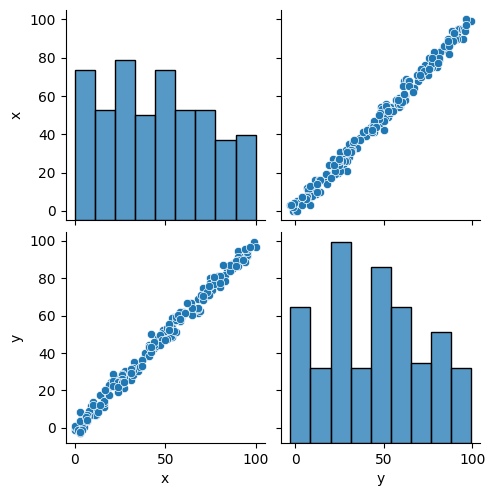

In [6]:
#using seaborn
sns.pairplot(df)

Try to keep the independent features as a dataframe or a 2d array and not as a series.

In [7]:
# independet feature
X=df[["x"]]
X.head()
print(f"the shape of X is {X.shape}")

X1=df["x"]
print(f"the shape of X1 is {X1.shape}")

Xtest=df[['x']]
#we try to have our features as X and not as X. whyyy.? it is shown bellow 

the shape of X is (212, 1)
the shape of X1 is (212,)


In [8]:
#for dependent feature we can have it as a series as it a 1d vector
Y=df['y']
Y.head()
Ytest=df['y']


performing standardization, we do this so that optimzation algorithm can be executed easily and we can get global minima easily. we stadardise each independent feature with mean=0 and standar deviation =1


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
Xtest=scaler.transform(Xtest)


In [10]:
# appling linear regression
from sklearn.linear_model import LinearRegression

In [11]:
regression=LinearRegression(n_jobs=-1)

For above we get an error as the independent feature was expected to be a 2d array

In [12]:
regression.fit(X,Y)

LinearRegression(n_jobs=-1)

In [13]:
print(f"the value of Coeffecient: {regression.coef_}")
print(f"the value of intercept: {regression.intercept_}")

the value of Coeffecient: [27.57594268]
the value of intercept: 44.85687968306603


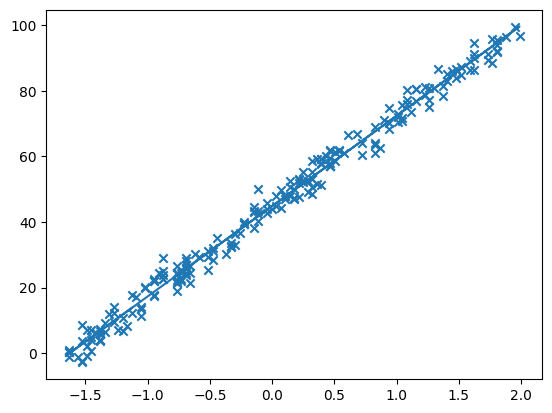

In [14]:
#plotting a line based on training line
plt.scatter(X,Y,marker='x')
plt.plot(X,regression.predict(X))

In [25]:
#prediction for the test data
Y_hat=regression.predict(Xtest)


array([182.73659308])

In [16]:
#performance matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [17]:
mse=mean_squared_error(Ytest,Y_hat)
mae=mean_absolute_error(Ytest,Y_hat)
rmse=np.sqrt(mse)
print(f"the value of means squared error is {mse}")
print(f"the value of mean absolute error is {mae}")
print(f"the value of root mean square error  is {rmse}")

the value of means squared error is 7.8536842961105755
the value of mean absolute error is 2.2691265716529987
the value of root mean square error  is 2.8024425589315074


R square metrice
R^2=1-SSR/SST
SSR=sum of square residual 
SST=sum of square total

In [18]:
from sklearn.metrics import r2_score

In [19]:
score=r2_score(Ytest,Y_hat)
score

0.9897776593096498

Atjusted R^2=1-[(1-R2)*(n-1)/(n-k-1)]**
where
R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [20]:
#atjusted R2 value
1-(1-score)*(len(Ytest)-1)/(len(Ytest)- X.shape[1]-1)

0.9897289814968386

In [21]:
import pickle 
pickel_out=open("model.pkl","wb")
pickle.dump(regression,pickel_out)
pickel_out.close()